### Step 1. Ensure that you have the dataset file named `transactions.csv` in the current directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

### Step 2. Complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

Use the empty cell to test the exercises. If you modify the original `df`, you can rerun the cell containing `exercise_0`.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    df1 = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    df1.sort_values(by=('nunique'), ascending=False, inplace=True)
    return df1

def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequencies of Transaction Type')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Type Frequencies splitted by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud')
    axs[1].set_ylabel('Occurence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    
    print("High-Risk Transactions:")
    print("- `CASH_OUT` and `TRANSFER` transactions have recorded fraudulent activities.")
    print("- Although the overall number of fraudulent transactions is low, these types highlight potential risk areas.\n")
    print("Zero Fraud Transactions:")
    print("- `PAYMENT`, `CASH_IN`, and `DEBIT` transactions show no fraudulent occurrences, indicating these transaction types might have effective fraud prevention measures or are less targeted by fraudulent activities.\n")
    print("Volume vs. Fraud:")
    print("- Despite `CASH_OUT` having a high volume, it has a relatively low number of fraudulent transactions, suggesting that while frequent, the fraud rate is very low (approximately 0.11%).")
    print("- `TRANSFER` transactions, although fewer in number, also exhibit a low fraud rate (approximately 0.43%).\n")
    print("Focus for Fraud Prevention:")
    print("- Given that fraud is present in `CASH_OUT` and `TRANSFER` transactions, these should be the focus for enhanced fraud detection and prevention strategies.\n")
    print("Potential Anomalies:")
    print("- The absence of fraud in `PAYMENT`, `CASH_IN`, and `DEBIT` might warrant further investigation to ensure that no undetected fraud is present.\n\n")

def visual_2(df):
    def query(df):
        df['Origin_Delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']
        df['Destination_Delta'] = df['oldbalanceDest'] - df['newbalanceDest']
        return df[df['type'] == 'CASH_OUT']
    plot = query(df).plot.scatter(x='Origin_Delta',y='Destination_Delta')
    plot.set_title('Source vs Destination Balance Delta for CASH_OUT Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    
    print("1. A cluster around (0, 0), indicating many transactions with minimal or zero balance changes, likely representing failed or reversed transactions.")
    print("2. Numerous points with positive Origin_Delta and zero Destination_Delta, suggesting withdrawals without direct transfers.")
    print("3. Some points with negative Destination_Delta and zero Origin_Delta, indicating cash payouts from the destination account.")
    print("4. Fewer points with both positive Origin_Delta and Destination_Delta, implying less common direct transfers or variable transaction amounts.")
    print("5. Points forming diagonal lines, suggesting direct exchanges between accounts.")
    print("6. Values mostly within -1000 to 1000 range, typical for 'CASH_OUT' transactions.")
    print("7. Outliers with significantly higher values indicating large transactions.")
    print("These observations indicate 'CASH_OUT' transactions primarily involve withdrawals and some direct transfers, with insights into transaction amounts and common patterns.\n\n")

def exercise_custom(df):
    cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])
    return cm
    
def visual_custom(df):
    ax = plt.subplot()
    sns.heatmap(exercise_custom(df), annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('isFlaggedFraud')
    ax.set_ylabel('isFraud')
    ax.set_title('Confusion Matrix for Fraud Detection')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

    print("1. High True Negative Rate:")
    print("- The model perfectly identifies all non-fraudulent cases, with 199853 true negatives (TN).\n")

    print("2. Zero True Positives:")
    print("- The model fails to detect any fraudulent cases, resulting in zero true positives (TP).\n")

    print("3. Presence of False Negatives:")
    print("- The model incorrectly predicts 147 fraudulent cases as non-fraudulent, indicating 147 false negatives (FN).\n")

    print("4. Zero False Positives:")
    print("- The model does not misclassify any non-fraudulent transactions as fraudulent, resulting in zero false positives (FP).\n")

    print("5. High Overall Accuracy:")
    print("- The accuracy is very high due to the large number of true negatives, but this metric is misleading because it does not reflect the model's performance on detecting fraud.\n")

    print("6. Undefined Precision and F1 Score:")
    print("- Precision and F1 score are undefined because there are no true positives.\n")

    print("7. Recall (Sensitivity) is Zero:")
    print("- The recall is zero, indicating the model fails to detect any actual fraudulent transactions.\n")

    print("8. Critical Model Flaw:")
    print("- The model is inadequate for practical fraud detection as it cannot identify fraudulent transactions, which is its primary purpose.\n")

    print("9. Dataset Imbalance Issue:")
    print("- The confusion matrix indicates a significant class imbalance, with many more non-fraudulent cases than fraudulent ones, which might contribute to the model's poor performance in detecting fraud.\n")

In [4]:
df = exercise_0('transactions.csv')

In [5]:
exercise_1(df)

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

In [6]:
exercise_2(df, 5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
exercise_3(df, 5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
173874,12,PAYMENT,1879.63,C1940327065,71709.08,69829.45,M1123956495,0.00,0.00,0,0
163809,12,PAYMENT,42171.95,C1658928168,29950.42,0.00,M1925088008,0.00,0.00,0,0
189849,13,CASH_OUT,184921.77,C1499523442,2189264.13,2004342.36,C828138449,977559.13,1162480.90,0,0
118041,11,PAYMENT,4334.01,C1890811862,0.00,0.00,M461968554,0.00,0.00,0,0
181705,12,CASH_OUT,77198.91,C697697754,0.00,0.00,C484258212,799695.83,1165414.32,0,0


In [8]:
exercise_4(df)

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [9]:
exercise_5(df)

C985934102     84
C1286084959    80
C248609774     75
C1590550415    74
C2083562754    74
C665576141     72
C977993101     70
C1360767589    69
C451111351     66
C97730845      64
Name: nameDest, dtype: int64

In [10]:
exercise_6(df)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
182862,13,CASH_OUT,408.00,C1894004688,408.00,0.0,C1293978242,898297.85,1075854.14,1,0
193765,13,TRANSFER,48375.02,C920803432,48375.02,0.0,C1767389067,0.00,0.00,1,0
193766,13,CASH_OUT,48375.02,C1894578299,48375.02,0.0,C590035788,374803.26,658520.33,1,0
196775,13,TRANSFER,4022667.54,C735463888,4022667.54,0.0,C1548348754,0.00,0.00,1,0


In [11]:
exercise_7(df)

,nunique
nameOrig,
C745009740,2
C260230637,2
C44568807,2
C1709295811,2
C361604284,1
...,...
C1648185402,1
C1648194899,1
C1648216508,1


### Creating graphs for the following. 
1. Transaction Types Bar Chart, Transaction Types Split by Fraud Bar Chart
1. Origin vs Destination Account Balance Delta Scatter Plot (Cash Out Transactions)

Ensure that the graphs have the following:
- Title
- Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

High-Risk Transactions:
- `CASH_OUT` and `TRANSFER` transactions have recorded fraudulent activities.
- Although the overall number of fraudulent transactions is low, these types highlight potential risk areas.

Zero Fraud Transactions:
- `PAYMENT`, `CASH_IN`, and `DEBIT` transactions show no fraudulent occurrences, indicating these transaction types might have effective fraud prevention measures or are less targeted by fraudulent activities.

Volume vs. Fraud:
- Despite `CASH_OUT` having a high volume, it has a relatively low number of fraudulent transactions, suggesting that while frequent, the fraud rate is very low (approximately 0.11%).
- `TRANSFER` transactions, although fewer in number, also exhibit a low fraud rate (approximately 0.43%).

Focus for Fraud Prevention:
- Given that fraud is present in `CASH_OUT` and `TRANSFER` transactions, these should be the focus for enhanced fraud detection and prevention strategies.

Potential Anomalies:
- The absence of fraud in `PAYMENT`, `

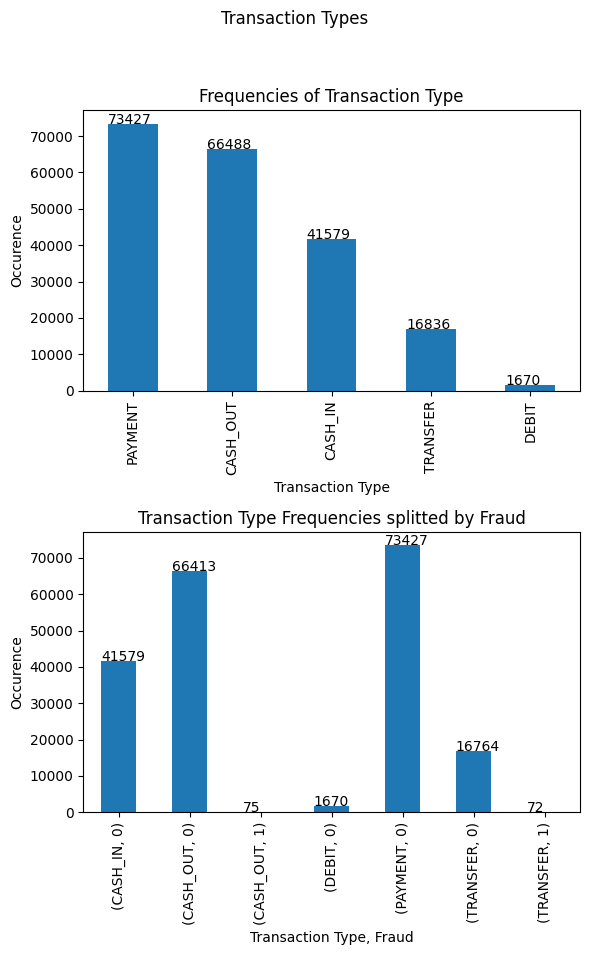

In [12]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Frequencies of Transaction Type')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Type Frequencies splitted by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud')
    axs[1].set_ylabel('Occurence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    
    print("High-Risk Transactions:")
    print("- `CASH_OUT` and `TRANSFER` transactions have recorded fraudulent activities.")
    print("- Although the overall number of fraudulent transactions is low, these types highlight potential risk areas.\n")
    print("Zero Fraud Transactions:")
    print("- `PAYMENT`, `CASH_IN`, and `DEBIT` transactions show no fraudulent occurrences, indicating these transaction types might have effective fraud prevention measures or are less targeted by fraudulent activities.\n")
    print("Volume vs. Fraud:")
    print("- Despite `CASH_OUT` having a high volume, it has a relatively low number of fraudulent transactions, suggesting that while frequent, the fraud rate is very low (approximately 0.11%).")
    print("- `TRANSFER` transactions, although fewer in number, also exhibit a low fraud rate (approximately 0.43%).\n")
    print("Focus for Fraud Prevention:")
    print("- Given that fraud is present in `CASH_OUT` and `TRANSFER` transactions, these should be the focus for enhanced fraud detection and prevention strategies.\n")
    print("Potential Anomalies:")
    print("- The absence of fraud in `PAYMENT`, `CASH_IN`, and `DEBIT` might warrant further investigation to ensure that no undetected fraud is present.\n\n")

visual_1(df)

1. A cluster around (0, 0), indicating many transactions with minimal or zero balance changes, likely representing failed or reversed transactions.
2. Numerous points with positive Origin_Delta and zero Destination_Delta, suggesting withdrawals without direct transfers.
3. Some points with negative Destination_Delta and zero Origin_Delta, indicating cash payouts from the destination account.
4. Fewer points with both positive Origin_Delta and Destination_Delta, implying less common direct transfers or variable transaction amounts.
5. Points forming diagonal lines, suggesting direct exchanges between accounts.
6. Values mostly within -1000 to 1000 range, typical for 'CASH_OUT' transactions.
7. Outliers with significantly higher values indicating large transactions.
These observations indicate 'CASH_OUT' transactions primarily involve withdrawals and some direct transfers, with insights into transaction amounts and common patterns.




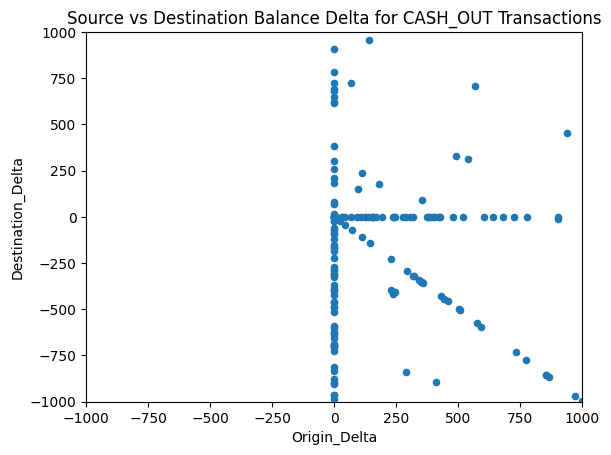

In [13]:
def visual_2(df):
    def query(df):
        df['Origin_Delta'] = df['oldbalanceOrg'] - df['newbalanceOrig']
        df['Destination_Delta'] = df['oldbalanceDest'] - df['newbalanceDest']
        return df[df['type'] == 'CASH_OUT']
    plot = query(df).plot.scatter(x='Origin_Delta',y='Destination_Delta')
    plot.set_title('Source vs Destination Balance Delta for CASH_OUT Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    
    print("1. A cluster around (0, 0), indicating many transactions with minimal or zero balance changes, likely representing failed or reversed transactions.")
    print("2. Numerous points with positive Origin_Delta and zero Destination_Delta, suggesting withdrawals without direct transfers.")
    print("3. Some points with negative Destination_Delta and zero Origin_Delta, indicating cash payouts from the destination account.")
    print("4. Fewer points with both positive Origin_Delta and Destination_Delta, implying less common direct transfers or variable transaction amounts.")
    print("5. Points forming diagonal lines, suggesting direct exchanges between accounts.")
    print("6. Values mostly within -1000 to 1000 range, typical for 'CASH_OUT' transactions.")
    print("7. Outliers with significantly higher values indicating large transactions.")
    print("These observations indicate 'CASH_OUT' transactions primarily involve withdrawals and some direct transfers, with insights into transaction amounts and common patterns.\n\n")

visual_2(df)

Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

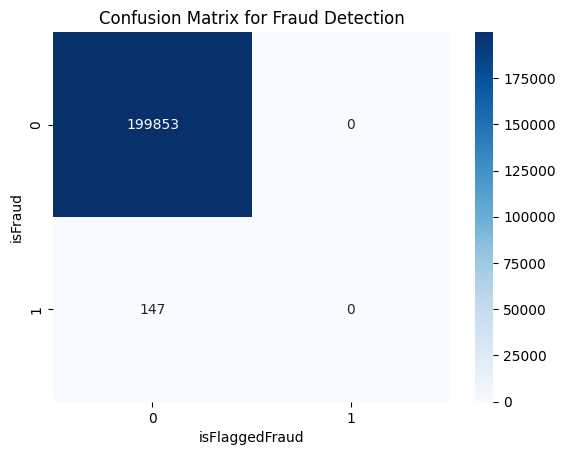

1. High True Negative Rate:
- The model perfectly identifies all non-fraudulent cases, with 199853 true negatives (TN).

2. Zero True Positives:
- The model fails to detect any fraudulent cases, resulting in zero true positives (TP).

3. Presence of False Negatives:
- The model incorrectly predicts 147 fraudulent cases as non-fraudulent, indicating 147 false negatives (FN).

4. Zero False Positives:
- The model does not misclassify any non-fraudulent transactions as fraudulent, resulting in zero false positives (FP).

5. High Overall Accuracy:
- The accuracy is very high due to the large number of true negatives, but this metric is misleading because it does not reflect the model's performance on detecting fraud.

6. Undefined Precision and F1 Score:
- Precision and F1 score are undefined because there are no true positives.

7. Recall (Sensitivity) is Zero:
- The recall is zero, indicating the model fails to detect any actual fraudulent transactions.

8. Critical Model Flaw:
- The mod

In [14]:
def exercise_custom(df):
    cm = confusion_matrix(df['isFraud'], df['isFlaggedFraud'])
    return cm

def visual_custom(df):
    ax = plt.subplot()
    sns.heatmap(exercise_custom(df), annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_xlabel('isFlaggedFraud')
    ax.set_ylabel('isFraud')
    ax.set_title('Confusion Matrix for Fraud Detection')
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1'])
    plt.show()

    print("1. High True Negative Rate:")
    print("- The model perfectly identifies all non-fraudulent cases, with 199853 true negatives (TN).\n")

    print("2. Zero True Positives:")
    print("- The model fails to detect any fraudulent cases, resulting in zero true positives (TP).\n")

    print("3. Presence of False Negatives:")
    print("- The model incorrectly predicts 147 fraudulent cases as non-fraudulent, indicating 147 false negatives (FN).\n")

    print("4. Zero False Positives:")
    print("- The model does not misclassify any non-fraudulent transactions as fraudulent, resulting in zero false positives (FP).\n")

    print("5. High Overall Accuracy:")
    print("- The accuracy is very high due to the large number of true negatives, but this metric is misleading because it does not reflect the model's performance on detecting fraud.\n")

    print("6. Undefined Precision and F1 Score:")
    print("- Precision and F1 score are undefined because there are no true positives.\n")

    print("7. Recall (Sensitivity) is Zero:")
    print("- The recall is zero, indicating the model fails to detect any actual fraudulent transactions.\n")

    print("8. Critical Model Flaw:")
    print("- The model is inadequate for practical fraud detection as it cannot identify fraudulent transactions, which is its primary purpose.\n")

    print("9. Dataset Imbalance Issue:")
    print("- The confusion matrix indicates a significant class imbalance, with many more non-fraudulent cases than fraudulent ones, which might contribute to the model's poor performance in detecting fraud.\n")


visual_custom(df)